# UnitedStates_COVID_19_Dataset Information:

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University
Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins
University Applied Physics Lab (JHU APL).

Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more
severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such
severe cases with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family,
which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started
from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. 
Currently (on the date 20 May 2020), this leads to a total of 300K+ Deaths across the globe, including 90K+ deaths 
alone in USA.The dataset  is provided to identify the deaths and recovered cases.

# 1-Data Exploration (Reading the data and attributes name)

In [99]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [100]:
#lets import the uscovid data
uscovid19=pd.read_csv('uscovid19.csv')
print(uscovid19.shape)

(58, 18)


In [101]:
#lets print the data
print(uscovid19.head(5))

   Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-05-21 02:32:54  32.3182  -86.9023   
1          Alaska             US  2020-05-21 02:32:54  61.3707 -152.4044   
2  American Samoa             US  2020-05-21 02:32:54 -14.2710 -170.1320   
3         Arizona             US  2020-05-21 02:32:54  33.7298 -111.4312   
4        Arkansas             US  2020-05-21 02:32:54  34.9697  -92.3731   

   Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0      13052     522        NaN  12530.0     1     266.194321       164450.0   
1        401      10      352.0     39.0     2      54.815493        37045.0   
2          0       0        NaN      0.0    60       0.000000          124.0   
3      14906     747     3773.0  10386.0     4     204.788838       165435.0   
4       5003     107     3852.0   1044.0     5     165.782801        96258.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing

In [102]:
#checking the information of the data and is there any null values present
uscovid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [103]:
#lets check is there any null value for any state
uscovid19.isnull().sum()

#so here we saw there are some missing values for some attributes 
#The attributes are Lat,Long_,Recovered,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate 
#so we will impute these attributes for our analysis

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

# 2-Exploratory Data Analysis (Exploring, Imputing, Cleaning & Visualizing)

In [104]:
#lets see the data description
uscovid19.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [105]:
#lets see what are the types of data are present in each attribute

for columns in uscovid19:
    print("Column Name:",columns)
    print(np.unique(uscovid19[columns], return_counts=True))
    print(uscovid19[columns].value_counts())
    print("\n")

Column Name: Province_State
(array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1

In [106]:
#lets see what are the columns and print those
print(uscovid19.columns)

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')


In [107]:
uscovid19.columns[uscovid19.isnull().any()]

#Here the attributes which has missing values are Lat,Long_,Recovered,Incident_Rate,People_Tested,People_Hospitalized,
#Mortality_Rate,Testing_Rate,Hospitalization_Rate so we will impute these attributes for our analysis

Index(['Lat', 'Long_', 'Recovered', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'Testing_Rate',
       'Hospitalization_Rate'],
      dtype='object')

In [108]:
#lets find the missing values for Lat and replace those
misslat = uscovid19[uscovid19['Lat'].isnull()]   
print(misslat)

#lets replace these values with 0, as we have no value for those
uscovid19['Lat'].fillna(0,inplace = True) 

#Again lets find is ther any missing values for Lat after putting values
misslat = uscovid19[uscovid19['Lat'].isnull()]   
print(misslat)

      Province_State Country_Region          Last_Update  Lat  Long_  \
9   Diamond Princess             US  2020-05-21 02:32:54  NaN    NaN   
13    Grand Princess             US  2020-05-21 02:32:54  NaN    NaN   

    Confirmed  Deaths  Recovered  Active   FIPS  Incident_Rate  People_Tested  \
9          49       0        NaN    49.0  88888            NaN            NaN   
13        103       3        NaN   100.0  99999            NaN            NaN   

    People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
9                   NaN        0.000000  84088888  USA           NaN   
13                  NaN        2.912621  84099999  USA           NaN   

    Hospitalization_Rate  
9                    NaN  
13                   NaN  
Empty DataFrame
Columns: [Province_State, Country_Region, Last_Update, Lat, Long_, Confirmed, Deaths, Recovered, Active, FIPS, Incident_Rate, People_Tested, People_Hospitalized, Mortality_Rate, UID, ISO3, Testing_Rate, Hospitalization_Rate]


In [109]:
#lets find the missing values for Long_ and replace those
misslong = uscovid19[uscovid19['Long_'].isnull()]   
print(misslat)

#lets replace these values with 0, as we have no value for those
uscovid19['Long_'].fillna(0, inplace = True) 

#Again lets find is ther any missing values for Long_ after putting values
misslong = uscovid19[uscovid19['Long_'].isnull()]   
print(misslong)

Empty DataFrame
Columns: [Province_State, Country_Region, Last_Update, Lat, Long_, Confirmed, Deaths, Recovered, Active, FIPS, Incident_Rate, People_Tested, People_Hospitalized, Mortality_Rate, UID, ISO3, Testing_Rate, Hospitalization_Rate]
Index: []
Empty DataFrame
Columns: [Province_State, Country_Region, Last_Update, Lat, Long_, Confirmed, Deaths, Recovered, Active, FIPS, Incident_Rate, People_Tested, People_Hospitalized, Mortality_Rate, UID, ISO3, Testing_Rate, Hospitalization_Rate]
Index: []


In [110]:
#lets fill Recovered missing value by the average
for dataset in uscovid19:
    mean = uscovid19['Recovered'].mean()
    std = uscovid19['Recovered'].std()
    is_null = uscovid19['Recovered'].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    missrec = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in Recovered column
    fillrec = uscovid19["Recovered"].copy()
    fillrec[np.isnan(fillrec)] = missrec
    uscovid19["Recovered"] = fillrec
    uscovid19["Recovered"] = uscovid19["Recovered"].astype(float)

#again check for Recovered attribute after missing value replacement
print(uscovid19['Recovered'].describe())

count       58.000000
mean      6995.482759
std      10529.267618
min      -4026.000000
25%       1037.250000
50%       3812.500000
75%       8203.500000
max      61886.000000
Name: Recovered, dtype: float64


In [111]:
#lets fill Incident_Rate missing value by the average
for dataset in uscovid19:
    mean = uscovid19['Incident_Rate'].mean()
    std = uscovid19['Incident_Rate'].std()
    is_null = uscovid19['Incident_Rate'].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    missinci = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in Incident_Rate column
    fillinci = uscovid19["Incident_Rate"].copy()
    fillinci[np.isnan(fillinci)] = missinci
    uscovid19["Incident_Rate"] = fillinci
    uscovid19["Incident_Rate"] = uscovid19["Incident_Rate"].astype(float)

#again check for Recovered attribute after missing value replacement
print(uscovid19['Incident_Rate'].describe())

count      58.000000
mean      394.964226
std       400.573126
min         0.000000
25%       142.993627
50%       250.477287
75%       489.346967
max      1821.620216
Name: Incident_Rate, dtype: float64


In [112]:
#lets fill People_Tested missing value by the average
for dataset in uscovid19:
    mean = uscovid19['People_Tested'].mean()
    std = uscovid19['People_Tested'].std()
    is_null = uscovid19['People_Tested'].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    misspeptest = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in People_Tested column
    fillpeptest = uscovid19["People_Tested"].copy()
    fillpeptest[np.isnan(fillpeptest)] = misspeptest
    uscovid19["People_Tested"] = fillpeptest
    uscovid19["People_Tested"] = uscovid19["People_Tested"].astype(float)

#again check for Recovered attribute after missing value replacement
print(uscovid19['People_Tested'].describe())

count    5.800000e+01
mean     2.245855e+05
std      2.969563e+05
min     -4.954800e+04
25%      4.563500e+04
50%      1.386545e+05
75%      2.838782e+05
max      1.505836e+06
Name: People_Tested, dtype: float64


In [113]:
#lets fill People_Hospitalized missing value by the average
for dataset in uscovid19:
    mean = uscovid19['People_Hospitalized'].mean()
    std = uscovid19['People_Hospitalized'].std()
    is_null = uscovid19['People_Hospitalized'].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    misspephosp = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in People_Hospitalized column
    fillpephosp = uscovid19["People_Hospitalized"].copy()
    fillpephosp[np.isnan(fillpephosp)] = misspephosp
    uscovid19["People_Hospitalized"] = fillpephosp
    uscovid19["People_Hospitalized"] = uscovid19["People_Hospitalized"].astype(float)

#again check for Recovered attribute after missing value replacement
print(uscovid19['People_Hospitalized'].describe())

count       58.000000
mean      4791.086207
std      11257.193665
min      -8109.000000
25%        342.250000
50%       1653.500000
75%       7745.500000
max      76410.000000
Name: People_Hospitalized, dtype: float64


In [114]:
#lets fill Mortality_Rate missing value by the average
for dataset in uscovid19:
    mean = uscovid19['Mortality_Rate'].mean()
    std = uscovid19['Mortality_Rate'].std()
    is_null = uscovid19['Mortality_Rate'].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    missmorate = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in Mortality_Rate column
    fillmorate = uscovid19["Mortality_Rate"].copy()
    fillmorate[np.isnan(fillmorate)] = missmorate
    uscovid19["Mortality_Rate"] = fillmorate
    uscovid19["Mortality_Rate"] = uscovid19["Mortality_Rate"].astype(float)

#again check for Recovered attribute after missing value replacement
print(uscovid19['Mortality_Rate'].describe())

count    58.000000
mean      4.433106
std       2.124836
min       0.000000
25%       3.018156
50%       4.382399
75%       5.450908
max       9.545549
Name: Mortality_Rate, dtype: float64


In [115]:
#lets fill Testing_Rate missing value by the average
for dataset in uscovid19:
    mean = uscovid19['Testing_Rate'].mean()
    std = uscovid19['Testing_Rate'].std()
    is_null = uscovid19['Testing_Rate'].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    missterate = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in Testing_Rate column
    fillterate = uscovid19["Testing_Rate"].copy()
    fillterate[np.isnan(fillterate)] = missterate
    uscovid19["Testing_Rate"] = fillterate
    uscovid19["Testing_Rate"] = uscovid19["Testing_Rate"].astype(float)

#again check for Recovered attribute after missing value replacement
print(uscovid19['Testing_Rate'].describe())

count       58.000000
mean      3875.145943
std       1905.234961
min         97.702058
25%       2722.901696
50%       3469.782532
75%       4622.586404
max      11377.424693
Name: Testing_Rate, dtype: float64


In [116]:
#lets fill Hospitalization_Rate missing value by the average
for dataset in uscovid19:
    mean = uscovid19['Hospitalization_Rate'].mean()
    std = uscovid19['Hospitalization_Rate'].std()
    is_null = uscovid19['Hospitalization_Rate'].isnull().sum()
    # calculate random numbers between the mean, std and is_null
    misshosprate = np.random.randint(mean - std, mean + std, size = is_null)
    # filling these random values in Hospitalization_Rate column
    fillhosprate = uscovid19["Hospitalization_Rate"].copy()
    fillhosprate[np.isnan(fillhosprate)] = misshosprate
    uscovid19["Hospitalization_Rate"] = fillhosprate
    uscovid19["Hospitalization_Rate"] = uscovid19["Hospitalization_Rate"].astype(float)

#again check for Recovered attribute after missing value replacement
print(uscovid19['Hospitalization_Rate'].describe())

count    58.000000
mean     13.987998
std       4.131829
min       6.778043
25%      11.204279
50%      13.330006
75%      16.297332
max      28.054438
Name: Hospitalization_Rate, dtype: float64


In [117]:
#Again checking the information of the data and is there any null values present
uscovid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   58 non-null     float64
 4   Long_                 58 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             58 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         58 non-null     float64
 11  People_Tested         58 non-null     float64
 12  People_Hospitalized   58 non-null     float64
 13  Mortality_Rate        58 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [135]:
#as Province_State, Country_Region, Last_Update, UID and ISO3 is not required for our analysis, so lets drop them
# for analysis now we can keep Province_State and after that we will drop that
uscovid19_final=uscovid19.drop(['Country_Region','Last_Update','UID','ISO3'],axis=1)
print(uscovid19_final.shape)

(58, 14)


In [119]:
#lets print the data
print(uscovid19_final.head())

   Province_State      Lat     Long_  Confirmed  Deaths  Recovered   Active  \
0         Alabama  32.3182  -86.9023      13052     522     6565.0  12530.0   
1          Alaska  61.3707 -152.4044        401      10      352.0     39.0   
2  American Samoa -14.2710 -170.1320          0       0     7370.0      0.0   
3         Arizona  33.7298 -111.4312      14906     747     3773.0  10386.0   
4        Arkansas  34.9697  -92.3731       5003     107     3852.0   1044.0   

   FIPS  Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0     1     266.194321       164450.0               1493.0        3.999387   
1     2      54.815493        37045.0              -8109.0        2.493766   
2    60       0.000000          124.0                 -3.0        3.000000   
3     4     204.788838       165435.0               1792.0        5.011405   
4     5     165.782801        96258.0                535.0        2.138717   

   Testing_Rate  Hospitalization_Rate  
0   3353.942386 

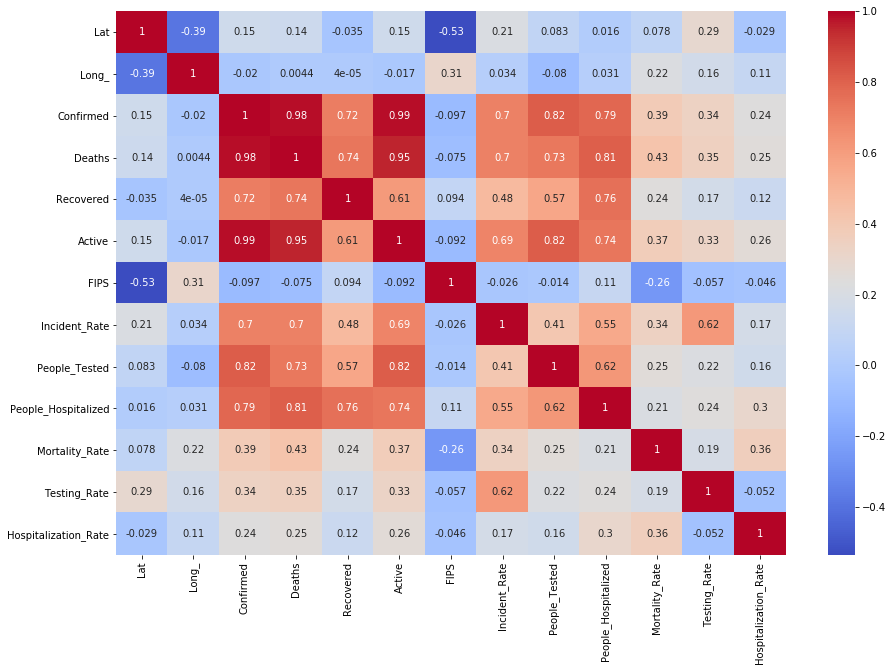

In [120]:
#lets see the corelation among data
plt.figure(figsize=(15,10))
sns.heatmap(uscovid19_final.corr(),cmap='coolwarm',annot=True)

Text(0.5, 1.0, 'Deaths Vs Confirmed')

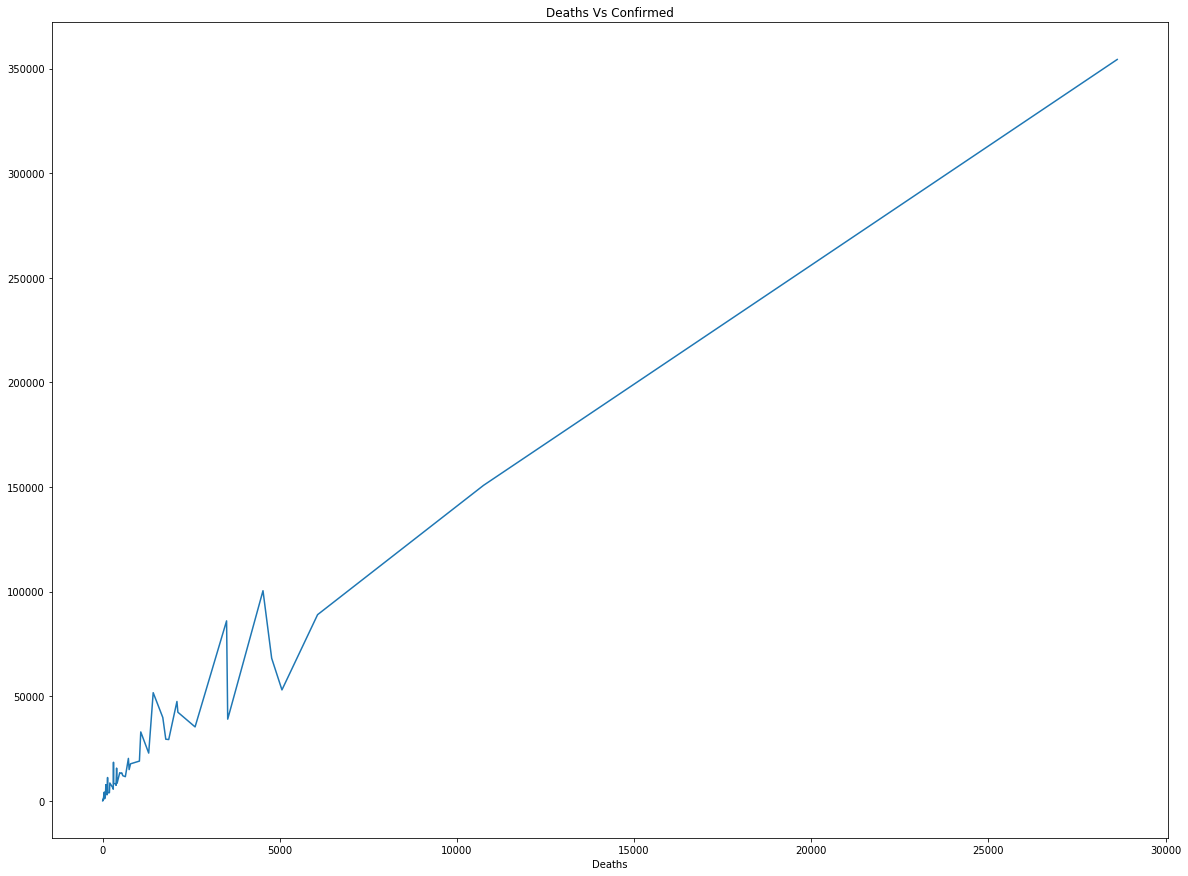

In [121]:
# now lets see the distribution of "Deaths" wrt "Confirmed" cases
byDeath=uscovid19_final.groupby('Deaths').mean()
plt.figure(figsize=(20,15))
byDeath['Confirmed'].plot()
plt.title('Deaths Vs Confirmed')

#so by looking this graph we can conclude that, as the confirmed cases increases deaths also increases.

Text(0.5, 1.0, 'Recovered Vs Confirmed')

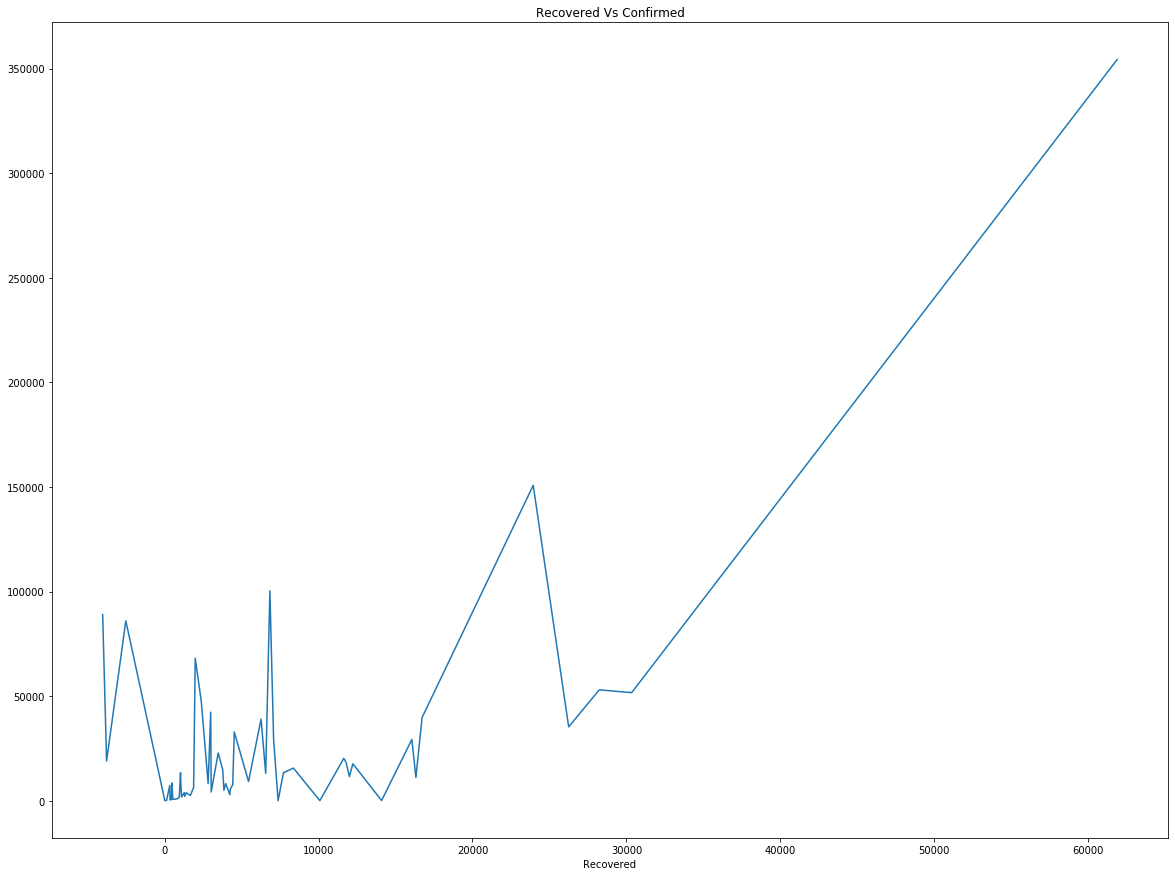

In [122]:
# now lets see the distribution of "Recovered" wrt "Confirmed" cases
byRec=uscovid19_final.groupby('Recovered').mean()
plt.figure(figsize=(20,15))
byRec['Confirmed'].plot()
plt.title('Recovered Vs Confirmed')

#so by looking this graph we can conclude that, as the confirmed cases increases recovered cases also increases.

In [123]:
#lets see the top 10 states where number of cases are more

top_cases=uscovid19_final[['Confirmed','Deaths','Recovered','Active','Province_State']].groupby('Province_State').sum().sort_values('Confirmed',ascending=False).head(10)
top_cases=top_cases.reset_index()
top_cases


,Province_State,Confirmed,Deaths,Recovered,Active
0,New York,354370,28636,61886.0,263848.0
1,New Jersey,150776,10749,23945.0,116082.0
2,Illinois,100418,4525,6837.0,95893.0
3,Massachusetts,88970,6066,-4026.0,82904.0
4,California,85997,3497,-2523.0,82500.0
5,Pennsylvania,68126,4770,1987.0,63356.0
6,Michigan,53009,5060,28234.0,19715.0
7,Texas,51673,1426,30341.0,19906.0
8,Florida,47471,2096,2380.0,45375.0
9,Maryland,42323,2123,2993.0,37207.0


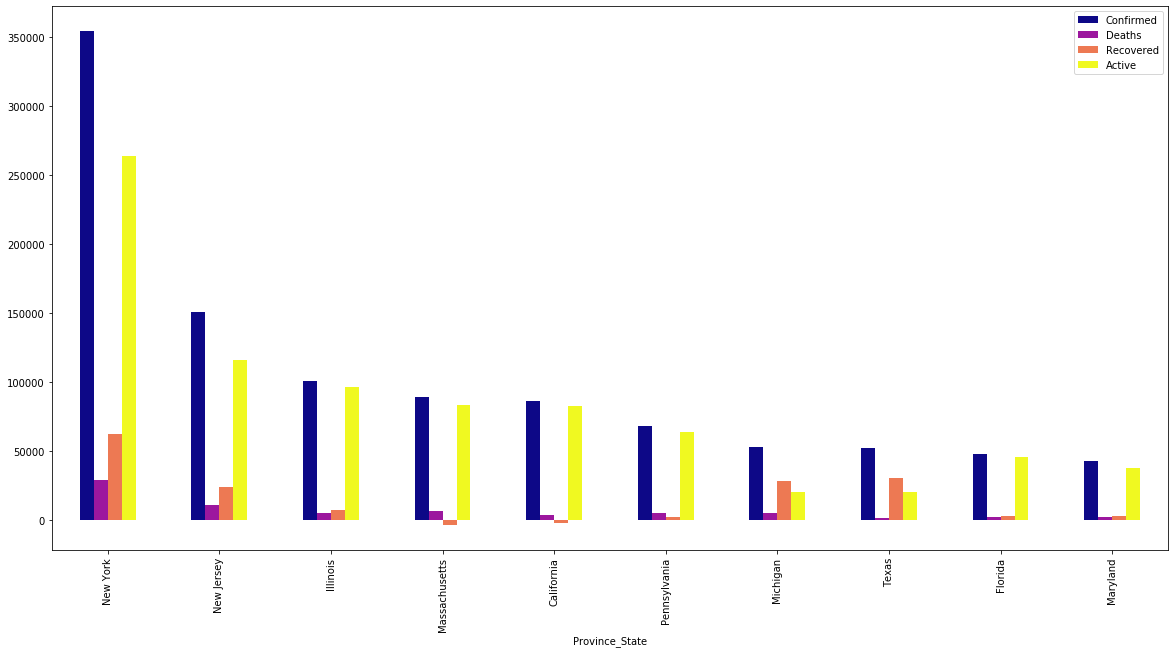

In [124]:
#lets see the top 10 states data in bar graph
top_cases=uscovid19_final[['Confirmed','Deaths','Recovered','Active','Province_State']].groupby('Province_State').sum().sort_values('Confirmed',ascending=False).head(10)
top_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

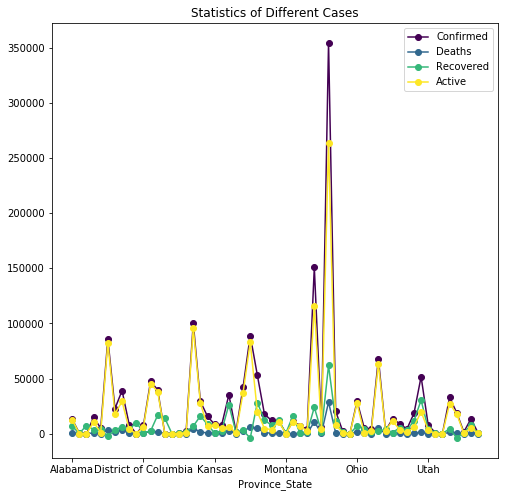

In [130]:
#lets see the exponential curve of states with all the cases
num_plot = uscovid19_final.groupby('Province_State')['Confirmed','Deaths','Recovered','Active'].sum()
num_plot.plot(figsize=(8,8),title='Statistics of Different Cases',colormap='viridis',marker='o')
plt.show()

In [136]:
#as Province_State is not required for our model building, we will drop that
uscovid19_final=uscovid19_final.drop(['Province_State'],axis=1)
print(uscovid19_final.shape)
print(uscovid19_final.head())

(58, 13)
       Lat     Long_  Confirmed  Deaths  Recovered   Active  FIPS  \
0  32.3182  -86.9023      13052     522     6565.0  12530.0     1   
1  61.3707 -152.4044        401      10      352.0     39.0     2   
2 -14.2710 -170.1320          0       0     7370.0      0.0    60   
3  33.7298 -111.4312      14906     747     3773.0  10386.0     4   
4  34.9697  -92.3731       5003     107     3852.0   1044.0     5   

   Incident_Rate  People_Tested  People_Hospitalized  Mortality_Rate  \
0     266.194321       164450.0               1493.0        3.999387   
1      54.815493        37045.0              -8109.0        2.493766   
2       0.000000          124.0                 -3.0        3.000000   
3     204.788838       165435.0               1792.0        5.011405   
4     165.782801        96258.0                535.0        2.138717   

   Testing_Rate  Hospitalization_Rate  
0   3353.942386             11.438860  
1   5063.940017              9.000000  
2    222.857246        

In [137]:
# separating the input and output/target variables
df_x=uscovid19_final.drop(columns=['Deaths'])
y=uscovid19_final[['Deaths']]

print(df_x.shape)
print(y.shape)

(58, 12)
(58, 1)


In [139]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

# 3-Building Different Model and Finding the Best Model

In [141]:
#lets print the shape of both input and target dataset
print(x.shape)
print(y.shape)

(58, 12)
(58, 1)


In [142]:
#defining the models which will be used for model building
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.linear_model import Lasso
lsreg=Lasso()
from sklearn.linear_model import Ridge
lrreg=Ridge()
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [143]:
#appending all the models
models=[]
models.append(('LinearRegression',lreg))
models.append(('KNeighborsRegressor',knn))
models.append(('Lasso',lsreg))
models.append(('Ridge',lrreg))
models.append(('GradientBoostingRegressor',gbr))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rf))

In [144]:
#printing the output of each model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Model=[]
RState=[]
score=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    max_r2_score=0.0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=r_state)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr
            final_r_state=r_state
    print('Final Random State is:', final_r_state)
    print('\n')
    RState.append(final_r_state*1)
    print('R2 Score is:', max_r2_score)
    print('\n')
    score.append(max_r2_score*100)
    print('\n')

************************ LinearRegression **********************


Final Random State is: 77


R2 Score is: 0.9940067049968546




************************ KNeighborsRegressor **********************


Final Random State is: 45


R2 Score is: 0.8881805187585335




************************ Lasso **********************


Final Random State is: 77


R2 Score is: 0.9937984984359874




************************ Ridge **********************


Final Random State is: 77


R2 Score is: 0.9728840022585862




************************ GradientBoostingRegressor **********************


Final Random State is: 59


R2 Score is: 0.9895915315959869




************************ AdaBoostRegressor **********************


Final Random State is: 62


R2 Score is: 0.9265668831793332




************************ RandomForestRegressor **********************


Final Random State is: 71


R2 Score is: 0.9524796955341183






In [145]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Random_State':RState,'R2_Score':score})
print(result)

                       Model  Random_State   R2_Score
0           LinearRegression            77  99.400670
1        KNeighborsRegressor            45  88.818052
2                      Lasso            77  99.379850
3                      Ridge            77  97.288400
4  GradientBoostingRegressor            59  98.959153
5          AdaBoostRegressor            62  92.656688
6      RandomForestRegressor            71  95.247970


In [148]:
# # So here LinearRegression is the best model,So lets build the final model with random_state=77

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=77)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)
print('R2 score is:',r2_score(y_test,y_pred))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score is: 0.9940067049968546
RMSE is: 255.612893479594


In [149]:
#checking the mean r2 score and overfitting and underfitting using cross validation
from sklearn.model_selection import cross_val_score
print('Mean R2 score of RandomForestRegressor is:', cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation of RandomForestRegressor is:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

Mean R2 score of RandomForestRegressor is: 0.480971770856629
Standard Deviation of RandomForestRegressor is: 0.5180149284892894


In [150]:
#lets predict the Death value
print('Actual Deaths:\n',y_test)
print('Predicted Deaths:\n',y_pred)

Actual Deaths:
     Deaths
48     305
38      49
33     190
30      16
41     299
25    6066
34   10749
16      77
51      54
21     376
27     786
26    5060
Predicted Deaths:
 [[  342.74362963]
 [   80.03479163]
 [  110.86929028]
 [  -54.83458367]
 [  301.27399799]
 [ 5957.22422849]
 [10676.02236605]
 [  -92.21148847]
 [  224.6709453 ]
 [  362.48046064]
 [ 1021.87420297]
 [ 4260.22198276]]


In [151]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(lreg,'lreg_deaths.obj')

['lreg_deaths.obj']

In [153]:
# load the model from the file
Deaths_from_joblib=joblib.load('lreg_deaths.obj')

In [154]:
#Use the loaded model to make predictions against test data
Deaths_from_joblib.predict(x_test)

array([[  342.74362963],
       [   80.03479163],
       [  110.86929028],
       [  -54.83458367],
       [  301.27399799],
       [ 5957.22422849],
       [10676.02236605],
       [  -92.21148847],
       [  224.6709453 ],
       [  362.48046064],
       [ 1021.87420297],
       [ 4260.22198276]])

# Conclusion:
    
So here 'LinearRegression Model' is the best model out of all model tested above and by looking this we can conclude
that our model is predicting around 99% of correct results for predicting the deaths from the confirmed covid19 cases.